# 第四章 便捷函数

In [58]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import sys

### 1.相关性

In [2]:
#想检验一下它们是否真的存在关联。一种方法就是看看两个公司股票收益率的相关性，强相关性
#意味着它们之间存在一定的关联性。当然，这不是严格的证明，特别是当我们所用的数据不够充
#足时。

In [4]:
#股票相关性分析
#在本节的教程中，我们将使用2个示例数据集提供收盘价数据，其中包含收盘价的最小值。
#第一家公司是BHP Billiton（BHP），其主要业务是石油、金属和钻石的开采。第二家公司是Vale
#（VALE），也是一家金属开采业的公司。因此，这两家公司有部分业务是重合的，尽管不是100%
#相同。按照如下步骤分析它们股票的相关性。

Covariance [[0.00028179 0.00019766]
 [0.00019766 0.00030123]]
Covariance diagonal [0.00028179 0.00030123]
Covariance trace 0.000583023549920278
[[1.00173366 0.70264666]
 [0.70264666 1.0708476 ]]
[[0.96719112 0.67841747]
 [0.67841747 1.03392182]]
Correlation coefficient [[1.         0.67841747]
 [0.67841747 1.        ]]
Out of sync False


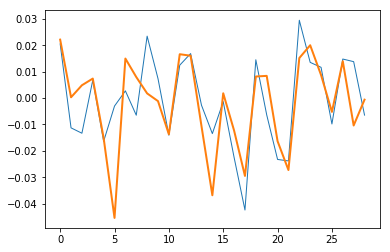

In [21]:
#(1) 首先，从CSV文件（本章示例代码文件夹中）中读入两只股票的收盘价数据，并计算收益率。
bhp = np.loadtxt('data/BHP.csv', delimiter=',', usecols=(6,), unpack=True)
vale = np.loadtxt('data/VALE.csv', delimiter=',', usecols=(6,), unpack=True)
#(2) 协方差描述的是两个变量共同变化的趋势，其实就是归一化前的相关系数。使用 cov 函
#数计算股票收益率的协方差矩阵
bhp_returns = np.diff(bhp) / bhp[ : -1]
vale_returns = np.diff(vale) / vale[ : -1]
covariance = np.cov(bhp_returns, vale_returns) 
print("Covariance", covariance)
#(3) 使用 diagonal 函数查看对角线上的元素：
#协方差矩阵中对角线上的元素并不相等，这与相关系数矩阵是不同的。
print("Covariance diagonal", covariance.diagonal())
#(4) 使用 trace 函数计算矩阵的迹，即对角线上元素之和：
print("Covariance trace", covariance.trace())
#(5) 两个向量的相关系数被定义为协方差除以各自标准差的乘积。计算向量 a 和 b 的相关系数
#的公式如下。
print(covariance/ (bhp_returns.std() * vale_returns.std()))
#使用下面的可以使对角线上的元素与下面的计算相同
print(covariance/ (bhp_returns.std(ddof=1) * vale_returns.std(ddof=1)))
#(6) 我们将用相关系数来度量这两只股票的相关程度。相关系数的取值范围在 -1 到 1 之间。
#根据定义，一组数值与自身的相关系数等于 1 。这是严格线性关系的理想值，实际上如果得到稍
#小一些的值，我们仍然会很高兴。使用 corrcoef 函数计算相关系数（或者更精确地，相关系数
#矩阵）：
print("Correlation coefficient", np.corrcoef(bhp_returns, vale_returns))
#对角线上的元素即BHP和VALE与自身的相关系数，因此均为1，很可能并非真的经过计算得
#出。相关系数矩阵是关于对角线对称的，因此另外两个元素的值相等，表示BHP与VALE的相关
#系数等于VALE和BHP的相关系数。看起来它们的相关程度似乎不是很强。
#(7) 另外一个要点是判断两只股票的价格走势是否同步。如果它们的差值偏离了平均差值2
#倍于标准差的距离，则认为这两只股票走势不同步。
#若判断为不同步，我们可以进行股票交易，等待它们重新回到同步的状态。计算这两只股票
#收盘价的差值，以判断是否同步：
difference = bhp - vale
avg = np.mean(difference)
dev = np.std(difference)
print ("Out of sync", np.abs(difference[-1] - avg) > 2 * dev)
t = np.arange(len(bhp_returns))
plt.plot(t, bhp_returns, lw=1)
plt.plot(t, vale_returns, lw=2)
plt.show()

我们知道，相关系数矩阵的主对角线元素为随机变量与自身的相关系数，应该等于1。<br/>
为何这里按照相关系数的定义手动计算出来的矩阵并非相关系数矩阵呢？主要有两点原因：<br/>
(1) 分母不应为定值，而要根据分子上的协方差计算对象确定。以左上角的元素为例，由于其分子为 cov(a, a) ，即随机变量a和其自身的协方差，则分母对应为 (bhp_returns.std() * bhp_returns.std()) 。其他位置的元素计算同理。<br/>
(2) 即使按照这一步给出的算式，副对角线上的元素也应该是正确的相关系数，但为何与下一步中的副对角线仍不一致呢？这是由于NumPy在计算协方差时，自由度参数默认为 1 ，即分母为N-1而不是N，从而求得总体协方差的无偏估计。而调用 .std() 计算标准差时，自由度参数默认为 0 ，从而求得的是样本标准差，而非总体标准差的无偏估计。因此，这一步计算的副对角线元素也并非正确的相关系数。译者测试了作者提供的源代码，如果在调用 .std() 方法时指定 ddof=1 ，即自由度设为 1 ，就可以得到与下一步计算结果相同的副对角线元素。如前
所述，若分别计算各个元素的分母，即可得到主对角线为1、完全正确的相关系数矩阵。

### 2.多项式

In [22]:
#实际上，任何可微的（从而也是连续的）函数都可以用一个N次多项式来估计，而比N次幂更高阶的
#部分为无穷小量可忽略不计。

Polynomial fit [ 1.11655581e-03 -5.28581762e-02  5.80684638e-01  5.79791202e+01]
Next value 57.9743076081007
Roots [ 35.48624287+30.62717062j  35.48624287-30.62717062j
 -23.63210575 +0.j        ]
Derivative [ 0.00334967 -0.10571635  0.58068464]
Extremas [24.47820054  7.08205278]
vals [57.97912023 58.50806325 58.93798925 59.27559757 59.52758754 59.7006585
 59.80150977 59.83684071 59.81335064 59.73773889 59.6167048  59.45694771
 59.26516696 59.04806186 58.81233177 58.56467601 58.31179393 58.06038485
 57.81714811 57.58878304 57.38198898 57.20346527 57.05991124 56.95802622
 56.90450955 56.90606056 56.96937859 57.10116298 57.30811305 57.59692815]
7
24


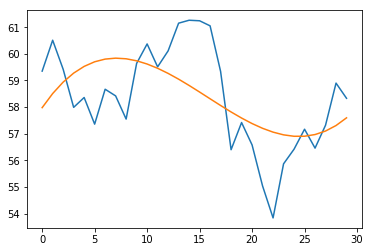

In [43]:
#多项式拟合
#NumPy中的 ployfit 函数可以用多项式去拟合一系列数据点，无论这些数据点是否来自连续
#函数都适用。
#(1) 我们继续使用BHP和VALE的股票价格数据。用一个三次多项式去拟合两只股票收盘价的差价
bhp=np.loadtxt('data/BHP.csv', delimiter=',', usecols=(6,), unpack=True)
vale=np.loadtxt('data/VALE.csv', delimiter=',', usecols=(6,),unpack=True)
t = np.arange(len(bhp))
#poly = np.polyfit(t, bhp - vale, int(17))
poly = np.polyfit(t, bhp - vale, int(3))
#拟合的结果为（在这个例子中是一个三次多项式）：
print("Polynomial fit", poly)
#(2) 上面看到的那些数字就是多项式的系数。用我们刚刚得到的多项式对象以及 polyval 函
#数，就可以推断下一个值：
print("Next value", np.polyval(poly, t[-1] + 1))
#(3) 理想情况下，BHP和VALE股票收盘价的差价越小越好。在极限情况下，差值可以在某个
#点为0。使用 roots 函数找出我们拟合的多项式函数什么时候到达0值：
print("Roots", np.roots(poly))
#(4) 我们在微积分课程中还学习过求极值的知识——极值可能是函数的最大值或最小值。
#记住微积分中的结论，这些极值点位于函数的导数为0的位置。使用 polyder 函数对多项式函数求导：
der = np.polyder(poly)
#你看到的这些数字即为导函数的系数。
print("Derivative", der)
#(5) 求出导数函数的根，即找出原多项式函数的极值点：
print("Extremas", np.roots(der))
#我们来复核一下结果，使用 polyval 计算多项式函数的值：
vals = np.polyval(poly, t)
print("vals",vals)
#(6) 现在，使用 argmax 和 argmin 找出最大值点和最小值点：
vals = np.polyval(poly, t)
print(np.argmax(vals))
print(np.argmin(vals))
#与上一步中的结果不完全一致，t 是用 arange 函数定义的。
#(7) 绘制源数据和拟合函数如下：
plt.plot(t, bhp - vale)
plt.plot(t, vals)
plt.show()

<font color="red">本节中的拟合函数有很多可以改进的地方。尝试使用三次方之外的不同指数，或者考虑在
拟合前对数据进行平滑处理。使用移动平均线就是一种数据平滑的方法。</font>

### 3.净额成交量

In [44]:
#成交量（volume）是投资中一个非常重要的变量，它可以表示价格波动的大小。OBV
#（On-Balance Volume，净额成交量或叫能量潮指标）是最简单的股价指标之一，它可以由当日收
#盘价、前一天的收盘价以及当日成交量计算得出。这里我们以前一日为基期计算当日的OBV值（可
#以认为基期的OBV值为0）。若当日收盘价高于前一日收盘价，则本日OBV等于基期OBV加上当
#日成交量。若当日收盘价低于前一日收盘价，则本日OBV等于基期OBV减去当日成交量。若当
#日收盘价相比前一日没有变化，则当日成交量以0计算。

In [50]:
#计算 OBV
#换言之，我们需要在成交量前面乘上一个由收盘价变化决定的正负号。在本节教程中，我们
#将学习该问题的两种解决方法，一种是使用NumPy中的 sign 函数，另一种是使用NumPy的
#piecewise 函数。
#(1) 把BHP数据分别加载到收盘价和成交量的数组中：
c, v=np.loadtxt('data/BHP.csv', delimiter=',', usecols=(6, 7), unpack=True)
#为了判断计算中成交量前的正负号，我们先使用diff函数计算收盘价的变化量。diff函数可以
#计算数组中两个连续元素的差值，并返回一个由这些差值组成的数组：
change = np.diff(c)
print( "Change", change)
#(2) NumPy中的 sign 函数可以返回数组中每个元素的正负符号，数组元素为负时返回 -1 ，为
#正时返回 1 ，否则返回 0 。对 change 数组使用 sign 函数：
signs = np.sign(change)
print ("Signs", signs)
#另外，我们也可以使用 piecewise 函数来获取数组元素的正负。顾名思义， piecewise
#函数可以分段给定取值。使用合适的返回值和对应的条件调用该函数：
pieces = np.piecewise(change, [change < 0, change > 0], [-1, 1])
print("Pieces", pieces)
#检查两次的输出是否一致：
print("Arrays equal?", np.array_equal(signs, pieces))
#(3) OBV值的计算依赖于前一日的收盘价，所以在我们的例子中无法计算首日的OBV值：
print("On balance volume", v[1:] * signs)

Change [ 1.92 -1.08 -1.26  0.63 -1.54 -0.28  0.25 -0.6   2.15  0.69 -1.33  1.16
  1.59 -0.26 -1.29 -0.13 -2.12 -3.91  1.28 -0.57 -2.07 -2.07  2.5   1.18
  1.03 -0.88  1.31  1.24 -0.59]
Signs [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]
Pieces [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]
Arrays equal? True
On balance volume [ 2620800. -2461300. -3270900.  2650200. -4667300. -5359800.  7768400.
 -4799100.  3448300.  4719800. -3898900.  3727700.  3379400. -2463900.
 -3590900. -3805000. -3271700. -5507800.  2996800. -3434800. -5008300.
 -7809799.  3947100.  3809700.  3098200. -3500200.  4285600.  3918800.
 -3632200.]


### 4.交易过程模拟

In [77]:
#避免使用循环
#使用 vectorize 函数可以减少你的程序中使用循环的次数。我们将用它来计算单个交易日的利润。
#(1) 首先，读入数据：
o, h, l, c = np.loadtxt('data/BHP.csv', delimiter=',', usecols=(3, 4, 5, 6), unpack=True)
#(4) calc_profit 函数非常简单。首先，我们尝试以比开盘价稍低一点的价格买入股票。如果
#这个价格不在当日的股价范围内，则尝试买入失败，没有获利，也没有亏损，我们均返回0。否则，
#我们将以当日收盘价卖出，所获得的利润即买入和卖出的差价。事实上，计算相对利润更为直观：
def calc_profit(open, high, low, close):
    #以比开盘价稍低的价格买入
    buy = open * float(89)
    # daily range
    if low < buy < high :
        return (close - buy)/buy
    else:
        return 0
#(3) NumPy中的 vectorize 函数相当于Python中的 map 函数。调用 vectorize 函数并给定
#calc_profit 函数作为参数，尽管我们还没有编写这个函数：
func = np.vectorize(calc_profit)
#(4) 我们现在可以先把 func 当做函数来使用。对股价数组使用我们得到的 func 函数:
profits = func(o, h, l, c)
print("Profits",profits)
#(5) 在所有交易日中有两个零利润日，即没有利润也没有损失。我们选择非零利润的交易日
#并计算平均值：
real_trades = profits[profits != 0]
print("Number of trades", len(real_trades), round(100.0 * len(real_trades)/len(c), 2),"%")
print ("Average profit/loss %", round(np.mean(real_trades) * 100, 2))
#(6) 乐观的人们对于正盈利的交易更感兴趣。选择正盈利的交易日并计算平均利润：
winning_trades = profits[profits > 0]
print("Number of winning trades", len(winning_trades),
      round(100.0 * len(winning_trades)/len(c), 2), "%")
print("Average profit %", round(np.mean(winning_trades) * 100, 2))
#(7) 悲观的人们对于负盈利的交易更感兴趣，选择负盈利的交易日并计算平均损失：
losing_trades = profits[profits < 0]
print("Number of losing trades", len(losing_trades),
      round(100.0 * len(losing_trades)/len(c), 2), "%")
print("Average loss %", round(np.mean(losing_trades) * 100, 2))

Profits [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of trades 0 0.0 %
Average profit/loss % nan
Number of winning trades 0 0.0 %
Average profit % nan
Number of losing trades 0 0.0 %
Average loss % nan


C:\Users\zsx\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\zsx\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### 5.数据平滑

In [78]:
#噪声数据往往很难处理，因此我们通常需要对其进行平滑处理。除了用计算移动平均线的方
#法，我们还可以使用NumPy中的一个函数来平滑数据。

Weights [0.         0.1882551  0.61126047 0.95048443 0.95048443 0.61126047
 0.1882551  0.        ]


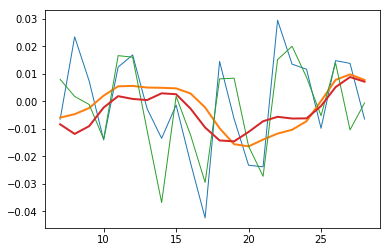

In [83]:
#hanning 函数是一个加权余弦的窗函数。
#使用 hanning 函数平滑数据
#我们将使用 hanning 函数平滑股票收益率的数组，步骤如下。
#(1) 调用 hanning 函数计算权重，生成一个长度为 N 的窗口（在这个示例中 N 取8）：
N = int(8)
weights = np.hanning(N)
print("Weights", weights)
#(2) 使用 convolve 函数计算BHP和VALE的股票收益率，以归一化处理后的 weights 作为参数：
bhp = np.loadtxt('data/BHP.csv', delimiter=',', usecols=(6,),unpack=True)
bhp_returns = np.diff(bhp) / bhp[ : -1]
smooth_bhp = np.convolve(weights/weights.sum(), bhp_returns) [N-1:-N+1]
vale = np.loadtxt('data/VALE.csv', delimiter=',', usecols=(6,),unpack=True)
vale_returns = np.diff(vale) / vale[ : -1]
smooth_vale = np.convolve(weights/weights.sum(), vale_returns) [N-1:-N+1]
#(3) 用 Matplotlib 绘图:
t = np.arange(N - 1, len(bhp_returns))
plt.plot(t, bhp_returns[N-1:], lw=1.0)
plt.plot(t, smooth_bhp, lw=2.0)
plt.plot(t, vale_returns[N-1:], lw=1.0)
plt.plot(t, smooth_vale, lw=2.0)
plt.show()

In [84]:
#图中的细线为股票收益率，粗线为平滑处理后的结果。如你所见，图中的折线有交叉。这些
#交叉点很重要，因为它们可能就是股价趋势的转折点，至少可以表明BHP和VALE之间的股价关
#系发生了变化。这些转折点可能会经常出现，我们可以利用它们预测未来的股价走势。

In [88]:
#(4) 使用多项式拟合平滑后的数据：
K = int(8)
t = np.arange(N - 1, len(bhp_returns))
poly_bhp = np.polyfit(t, smooth_bhp, K)
poly_vale = np.polyfit(t, smooth_vale, K)
#(5) 现在，我们需要解出上面的两个多项式何时取值相等，即在哪些地方存在交叉点。这等
#价于先对两个多项式函数作差，然后对所得的多项式函数求根。使用 polysub 函数对多项式作差:
poly_sub = np.polysub(poly_bhp, poly_vale)
xpoints = np.roots(poly_sub)
print("Intersection points", xpoints)
#(6) 得到的结果为复数，这不利于我们后续处理，除非时间也有实部和虚部。因此，这里需
#要用 isreal 函数来判断数组元素是否为实数：
reals = np.isreal(xpoints)
print("Real number?", reals)


Intersection points [27.73321597+0.j         27.51284094+0.j         24.32064343+0.j
 18.86423973+0.j         12.4379719 +1.73218179j 12.4379719 -1.73218179j
  6.34613053+0.62519463j  6.34613053-0.62519463j]
Real number? [ True  True  True  True False False False False]


In [90]:
#可以看到有一部分数据为实数，因此我们用 select 函数选出它们。 select 函数可以根据一
#组给定的条件，从一组元素中挑选出符合条件的元素并返回数组：
xpoints = np.select([reals], [xpoints])
xpoints = xpoints.real
#得到的实数交叉点如下所示：
print("Real intersection points", xpoints)
#(7) 我们需要去掉其中为0的元素。 trim_zeros 函数可以去掉一维数组中开头和末尾为0的元素：
#去掉0元素后，输出结果如下所示：
print("Sans 0s", np.trim_zeros(xpoints))

Real intersection points [27.73321597 27.51284094 24.32064343 18.86423973  0.          0.
  0.          0.        ]
Sans 0s [27.73321597 27.51284094 24.32064343 18.86423973]


In [91]:
#我们使用 hanning 函数对股票收益率数组进行了平滑处理，使用 polysub 函数对两个多项式
#作差运算，以及使用 isreal 函数判断数组元素是否为实数，并用 select 函数选出了实数元素。
#最后，我们用 trim_zeros 函数去掉数组首尾的0元素。

<font color="red">
请尝试使用其他的平滑函数，如 hamming 、 blackman 、 bartlett 以及 kaiser 。它们的
使用方法和 hanning 函数类似。
</font>